In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

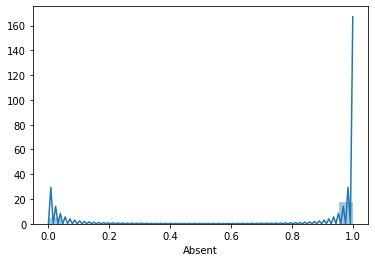

In [2]:
Absents = pd.read_csv("train_data.csv")
X_test  = pd.read_csv("test_data.csv")
Y_test  = pd.read_csv("sample_submission.csv")
sns.distplot(Absents['Absent'])

## Pre tratemento de dados

In [3]:
abs = [x for x in Absents['Absent'] if x == 1]
workload = [int(x.replace(",","")) for x in Absents['Work load Average/day ']]
Absents['Work load Average/day '] = workload

Absents = Absents.drop(columns = 'ID')
X_test  = X_test.drop(columns  = 'ID')

AbsentsY = Absents['Absent'] 
AbsentsX = Absents.drop(columns = 'Absent')
AbsentsX

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31
3,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,28,9,3,1,246,25,16,41,261756,87,0,1,0,1,0,0,67,170,23
496,28,9,3,1,246,25,16,41,261756,87,0,1,0,1,0,0,67,170,23
497,28,9,3,1,118,10,10,37,261756,87,0,1,0,0,0,0,83,172,28
498,23,9,3,1,155,12,14,34,261756,87,0,1,2,1,0,0,95,196,25


## Normalizar os dados

In [4]:
from sklearn import preprocessing

def normalize_dataset():
    global AbsentsX,X_testas
    x  = AbsentsX.values 
    x2 = X_test.values
    min_max_scaler = preprocessing.MinMaxScaler()
    scaler    = min_max_scaler.fit(x)
    x_scaled  = scaler.transform(x)
    x2_scaled = scaler.transform(x2)
    df  = pd.DataFrame(x_scaled)
    df2 = pd.DataFrame(x2_scaled)

    i = 0
    for x in AbsentsX:
        AbsentsX[x] = df[i]
        X_test [x] = df2[i]
        i+=1


        
def standardize_dataset():
    global AbsentsX,X_test
    x  =  AbsentsX.values
    x2 = X_test.values
    standart_scaler = preprocessing.StandardScaler()
    scaler = standart_scaler.fit(x)
    x_scaled  = scaler.transform(x)
    x2_scaled = scaler.transform(x2) 
    df  = pd.DataFrame(x_scaled)
    df2 = pd.DataFrame(x2_scaled)

    i = 0
    for x in AbsentsX:
        AbsentsX[x] = df[i]
        X_test[x]  = df2[i]
        i+=1
        
def binarize_dataset():
    global AbsentsX,X_test
    x  =  AbsentsX.values
    x2 = X_test.values
    Binarizer = preprocessing.Binarizer()
    binarizer = Binarizer.fit(x)
    x_scaled  = binarizer.transform(x)
    x2_scaled = binarizer.transform(x2) 
    df  = pd.DataFrame(x_scaled)
    df2 = pd.DataFrame(x2_scaled)

    i = 0
    for x in AbsentsX:
        AbsentsX[x] = df[i]
        X_test[x]  = df2[i]
        i+=1


##binarize_dataset()
normalize_dataset()
##standardize_dataset()
AbsentsX

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0.928571,0.545455,0.25,0.0,0.633333,0.659574,0.384615,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.2,0.653846,0.272727,0.578947
1,0.000000,0.545455,0.25,0.0,0.000000,0.170213,0.576923,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.0,0.807692,0.454545,0.631579
2,0.821429,0.545455,0.50,0.0,0.225926,0.978723,0.576923,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.0,0.634615,0.212121,0.631579
3,0.250000,0.545455,0.75,0.0,0.596296,0.000000,0.423077,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.0,0.230769,0.151515,0.263158
4,0.821429,0.545455,0.75,0.0,0.633333,0.659574,0.384615,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.2,0.653846,0.272727,0.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.000000,0.727273,0.25,0.0,0.474074,0.425532,0.500000,0.451613,0.322830,0.315789,0.0,0.0,0.00,1.0,0.0,0.0,0.211538,0.212121,0.210526
496,1.000000,0.727273,0.25,0.0,0.474074,0.425532,0.500000,0.451613,0.322830,0.315789,0.0,0.0,0.00,1.0,0.0,0.0,0.211538,0.212121,0.210526
497,1.000000,0.727273,0.25,0.0,0.000000,0.106383,0.269231,0.322581,0.322830,0.315789,0.0,0.0,0.00,0.0,0.0,0.0,0.519231,0.272727,0.473684
498,0.821429,0.727273,0.25,0.0,0.137037,0.148936,0.423077,0.225806,0.322830,0.315789,0.0,0.0,0.50,1.0,0.0,0.0,0.750000,1.000000,0.315789


In [5]:
X_test

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0.821429,0.727273,1.00,0.000000,0.225926,0.446809,0.230769,0.096774,0.322830,0.315789,0.0,1.0,0.00,0.0,0.0,0.0,0.000000,0.242424,0.000000
1,0.821429,0.727273,1.00,0.000000,0.481481,0.425532,0.423077,0.645161,0.322830,0.315789,0.0,0.0,0.50,0.0,0.0,0.2,0.576923,0.060606,0.684211
2,0.821429,0.727273,0.00,0.000000,0.225926,0.978723,0.576923,0.354839,0.322830,0.315789,0.0,0.0,0.00,1.0,0.0,0.0,0.634615,0.212121,0.631579
3,0.821429,0.727273,0.50,0.000000,0.396296,0.446809,0.230769,0.032258,0.322830,0.315789,0.0,0.0,0.25,0.0,0.0,0.4,0.250000,0.181818,0.263158
4,0.821429,0.727273,0.00,0.000000,0.225926,0.446809,0.230769,0.096774,0.322830,0.315789,0.0,1.0,0.00,0.0,0.0,0.0,0.000000,0.242424,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.500000,0.545455,0.25,0.000000,0.633333,0.659574,0.384615,0.193548,0.339296,0.631579,0.0,0.0,0.50,1.0,0.0,0.2,0.653846,0.272727,0.578947
236,0.392857,0.545455,0.25,0.000000,0.433333,0.127660,0.423077,0.322581,0.339296,0.631579,0.0,1.0,0.25,0.0,0.0,0.2,0.615385,0.272727,0.526316
237,0.000000,-0.090909,0.25,0.000000,0.000000,0.191489,0.384615,0.419355,0.377540,0.736842,0.0,0.0,0.25,1.0,0.0,1.6,0.807692,0.212121,0.789474
238,0.000000,-0.090909,0.50,0.333333,0.418519,0.638298,0.423077,0.387097,0.377540,0.736842,0.0,0.0,0.50,1.0,0.0,0.4,0.846154,0.212121,0.842105


## reinserir a coluna absent

In [6]:
AbsentsX.insert(len(AbsentsX.columns),'Absent',AbsentsY)

## Balancear o dataset

In [7]:
def balance_dataset(nr_0,nr_1):
    global AbsentsX
    abs_shuffled = AbsentsX.sample(frac=1,random_state=4)
    A0 = abs_shuffled.loc[abs_shuffled['Absent'] == 1].sample(n=nr_0,random_state=4)
    A1 = abs_shuffled.loc[abs_shuffled['Absent'] == 0].sample(n=nr_1,random_state=4)
    
    balanced_absents = pd.concat([A0,A1])
    AbsentsX = balanced_absents.sample(frac=1,random_state=4)
        
    


A0 = len(AbsentsX[AbsentsX['Absent'] == 0])
A1 = len(AbsentsX[AbsentsX['Absent'] == 1])

nr_elements_dataset = A0

if A1 < A0:
    nr_elements_dataset = A1

print(nr_elements_dataset)
balance_dataset(nr_elements_dataset,nr_elements_dataset)
##balance_dataset(125,nr_elements_dataset)

print(len(AbsentsX))


105
210


## Removemos os outliers

In [8]:
q1 = AbsentsX.quantile(0.975)
q4 = AbsentsX.quantile(0.025)


OUTLIER_COLUMNS = ['Reason for absence',"Age","Transportation expense",
                  "Service time","Work load Average/day ","Hit target",
                  "Weight","Height","Body mass index"]

def remove_outliers(OUTLIER_COLUMNS):
    global AbsentsX
    for i in OUTLIER_COLUMNS:
        AbsentsX = AbsentsX.drop(AbsentsX[AbsentsX[i] > q1[i]].index)
        AbsentsX = AbsentsX.drop(AbsentsX[AbsentsX[i] < q4[i]].index)




remove_outliers(OUTLIER_COLUMNS)

In [9]:
print(len(Absents[Absents['Absent'] == 1]))
print(len(Absents[Absents['Absent'] == 0]))

395
105


## Feature selection + extraction

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Weight,Height,Body mass index,Absent
403,0.500000,0.181818,0.25,0.666667,0.000000,0.170213,0.741935,0.222412,0.894737,0.0,0.25,1.0,0.807692,0.454545,0.631579,1
183,1.000000,0.181818,0.00,0.666667,0.396296,0.446809,0.032258,0.794001,0.736842,0.0,0.25,0.0,0.250000,0.181818,0.263158,0
65,0.821429,0.818182,0.75,1.000000,0.225926,0.446809,0.096774,0.274896,0.631579,0.0,0.00,0.0,0.000000,0.242424,0.000000,0
327,0.392857,0.909091,0.50,1.000000,0.000000,0.106383,0.322581,0.451612,0.842105,0.0,0.00,0.0,0.519231,0.272727,0.473684,1
481,0.892857,0.636364,0.00,0.000000,0.225926,0.361702,0.419355,0.253690,0.631579,0.0,0.50,0.0,0.134615,0.212121,0.157895,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.964286,0.000000,0.25,0.333333,0.000000,0.106383,0.322581,0.593616,0.736842,0.0,0.00,0.0,0.519231,0.272727,0.473684,1
384,0.392857,0.090909,0.50,0.333333,0.144444,0.468085,0.064516,0.265374,0.789474,0.0,0.00,1.0,0.365385,0.666667,0.157895,1
185,0.821429,0.272727,0.50,0.666667,0.396296,0.446809,0.032258,0.696867,0.789474,0.0,0.25,0.0,0.250000,0.181818,0.263158,0
254,0.821429,0.636364,0.00,0.000000,0.633333,0.659574,0.193548,0.345141,0.684211,0.0,0.50,1.0,0.653846,0.272727,0.578947,0


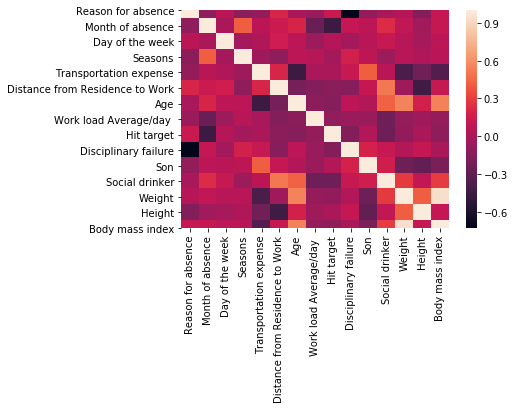

In [10]:
AbsentsY = AbsentsX['Absent']
AbsentsX = AbsentsX.drop(columns="Absent")
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


Columns = [x for x in AbsentsX]

def feature_selectionKBest(nr_features):
    
    global AbsentsX,AbsentsY,X_test
    feature_selector = SelectKBest(chi2,k=nr_features).fit(AbsentsX,AbsentsY)
    
    
    keep_feature = feature_selector.get_support()
    
    droping_columns = [Columns[x] for x in range(len(keep_feature))
                          if keep_feature[x] == 0]
    
    AbsentsX = AbsentsX.drop(columns=droping_columns)
    X_test  = X_test.drop(columns=droping_columns)
    
    

from sklearn.feature_selection import RFE
from sklearn.svm import SVR


def feature_selectionRFE(nr_features):
    
    global AbsentsX,AbsentsY,X_test
    estimator = SVR(kernel="linear")
    selector = RFE(estimator, nr_features, step=1)
    selector = selector.fit(AbsentsX,AbsentsY)
        
    keep_feature = selector.get_support()
    
    droping_columns = [Columns[x] for x in range(len(keep_feature))
                          if keep_feature[x] == 0]
    
    AbsentsX = AbsentsX.drop(columns=droping_columns)
    X_test  = X_test.drop(columns=droping_columns)
    


def featureExtraction(correlation_coefficient):
    global AbsentsX,AbsentsY,X_test,Columns
    correlation = AbsentsX.corr()
    
    new_columns = list()
    
    
    while(len(Columns) > 0):
        copy_columns = list(Columns)
        new_column = list()
        column = Columns[0]
        Columns.remove(column)
        new_column.append(column)
        for i in copy_columns:
            if(i != column):
                if AbsentsX[column].corr(AbsentsX[i]) > correlation_coefficient:
                    new_column.append(i)
                    Columns.remove(i)
        new_columns.append(new_column)
              
    
    for x in new_columns:
        averages = list()
        for index,row in AbsentsX.iterrows():
                average = 0;
                for i in x:
                    average += row[i]
                average = average/len(x)
                averages.append(average)
                            
        AbsentsX = AbsentsX.drop(columns = x)
        AbsentsX.insert(len(AbsentsX.columns)," + ".join(x),averages)    
    
                
    
    for x in new_columns:
        averages = list()
        for index,row in X_test.iterrows():
                average = 0;
                for i in x:
                    average += row[i]
                average = average/len(x)
                averages.append(average)
                            
        X_test = X_test.drop(columns = x)
        X_test.insert(len(X_test.columns)," + ".join(x),averages)    

        
feature_selectionKBest(15)

##feature_selectionRFE(15)

##featureExtraction(0.5)

sns.heatmap(AbsentsX.corr())      
AbsentsX.insert(len(AbsentsX.columns),"Absent",AbsentsY)
AbsentsX


# Modelos

In [11]:
X = AbsentsX.drop(columns= 'Absent')
Y = AbsentsX['Absent']

## LinearRegression
### Area under the curve

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
##X_test = X_new.transform(X_test)

##X = Absents.drop('Absent',axis = 1)
##Y = Absents['Absent']

lm = LinearRegression(fit_intercept=False,normalize=True,copy_X= False)
lm.fit(X,Y)
predictions = lm.predict(X_test)
from sklearn.metrics import accuracy_score
predictions = [int( x  > 0.5) for x in predictions]
print(predictions)
accuracy_score(Y_test['Absent'],predictions)


[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]


0.675

#### Using Gridsearch

In [14]:
param_grid = {'fit_intercept': [True,False], 'normalize': [True,False], 'copy_X': [False,True],'n_jobs': [None,1,2,4,8,16,32]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearRegression(),param_grid,refit=True,verbose=0,cv=5)
grid.fit(X,Y)
print(grid.best_params_)
grid_predictions = grid.predict(X_test)
grid_predictions = [int( x  > 0.5) for x in grid_predictions]
accuracy_score(Y_test['Absent'],grid_predictions)

{'copy_X': False, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


C:\Users\hugoa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.675

## Dummy classifier

In [15]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent')
clf.fit(X,Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)


0.8166666666666667

#### Using Grid search

In [16]:
param_grid = {'strategy': ['stratified','most_frequent',
                          'prior','uniform']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DummyClassifier(),param_grid,refit=True,verbose=0)
grid.fit(X,Y)
print(grid.best_params_)
grid_predictions = grid.predict(X_test)
accuracy_score(Y_test['Absent'],grid_predictions)

{'strategy': 'stratified'}


C:\Users\hugoa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hugoa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.5541666666666667

## LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'saga')
LR.fit(X,Y)
predictions = LR.predict(X_test)
print(predictions)
accuracy_score(Y_test['Absent'],predictions)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1]


0.275

## KMeans

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
predictions = kmeans.predict(X_test)
print(predictions)
accuracy_score(Y_test['Absent'],predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0.18333333333333332

## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X,Y)
predictions = knn.predict(X_test)
print(predictions)
accuracy_score(Y_test['Absent'],predictions)

[0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0]


0.35

## SVM

In [20]:
from sklearn.svm import SVC
model = SVC(gamma = 'auto')
model.fit(X,Y)
predictions = model.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)


0.7333333333333333

#### Using GridSearch

In [21]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X,Y)
grid.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

C:\Users\hugoa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.655, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.717, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.683, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.638, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.667, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.650, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished
C:\Users\hugoa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [22]:
grid_predictions = grid.predict(X_test)
accuracy_score(Y_test['Absent'],grid_predictions)


0.20416666666666666

## NaiveBayes

In [23]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X,Y)
predictions = classifier.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)


ValueError: Input X must be non-negative

## Perceptron

In [24]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.19166666666666668

## Multilayer percetron

In [25]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X,Y)

predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.8

## Decision Trees

In [26]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X,Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.2916666666666667

## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200)

##params_rf = {'n_estimators': [50, 100, 200,400]}

##rf_gs = GridSearchCV(rf, params_rf, cv=5)

##rf_gs.fit(X, Y)

rf.fit(X,Y)

##print(rf_gs.best_params_)
predictions = rf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.3375

## PassiveAgressiveClassifier

In [28]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0,
tol=1e-3)
clf.fit(X, Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.21666666666666667

## Nearest Centroid

In [29]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X, Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.7416666666666667

## RadiusNeighborsClassifier

In [30]:
from sklearn.neighbors import RadiusNeighborsClassifier

clf = RadiusNeighborsClassifier(radius=1.9)
clf.fit(X,Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

ValueError: No neighbors found for test samples [7, 13, 49, 51, 63, 69, 76, 183, 204], you can try using larger radius, give a label for outliers, or consider removing them from your dataset.

## Ensemble learning

## Bagging

In [31]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

                            
clf = BaggingClassifier(base_estimator=SVC(gamma='auto'),
                       n_estimators=10, random_state=0)
clf.fit(X, Y)
predictions = clf.predict(X_test)
print(predictions)
accuracy_score(Y_test['Absent'],predictions)

[1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


0.6291666666666667

## Stacking
### needs sklearn version 0.23 or  above

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

ImportError: cannot import name 'StackingClassifier' from 'sklearn.ensemble' (C:\Users\hugoa\Anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

## AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

clf = AdaBoostClassifier(n_estimators = 100, random_state=0)
clf.fit(X, Y)
print(clf.feature_importances_)
preditions = clf.predict(X_test)
for x in range(len(predictions)):
    if(predictions[x] != Y_test['Absent'][x]):
        print(str(x) + " : predicted" + str(predictions[x]) + " actual " + str(Y_test['Absent'][x]) ) 
        
accuracy_score(Y_test['Absent'],predictions)

[0.39 0.1  0.01 0.02 0.04 0.01 0.01 0.15 0.15 0.01 0.02 0.   0.03 0.05
 0.01]
5 : predicted0 actual 1
7 : predicted0 actual 1
8 : predicted0 actual 1
9 : predicted0 actual 1
10 : predicted0 actual 1
11 : predicted0 actual 1
12 : predicted0 actual 1
13 : predicted0 actual 1
14 : predicted0 actual 1
15 : predicted0 actual 1
16 : predicted0 actual 1
18 : predicted0 actual 1
19 : predicted0 actual 1
20 : predicted0 actual 1
21 : predicted0 actual 1
22 : predicted0 actual 1
24 : predicted0 actual 1
26 : predicted0 actual 1
32 : predicted0 actual 1
33 : predicted0 actual 1
34 : predicted0 actual 1
35 : predicted0 actual 1
36 : predicted0 actual 1
37 : predicted0 actual 1
39 : predicted0 actual 1
41 : predicted0 actual 1
42 : predicted0 actual 1
43 : predicted0 actual 1
44 : predicted0 actual 1
45 : predicted0 actual 1
46 : predicted0 actual 1
47 : predicted0 actual 1
48 : predicted0 actual 1
49 : predicted0 actual 1
50 : predicted0 actual 1
51 : predicted0 actual 1
52 : predicted0 actual 1
5

0.6291666666666667

## Voting classifier

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LogisticRegression(multi_class='multinomial',solver = 'saga', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [36]:
eclf1 = VotingClassifier(estimators=[
         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X.values, Y.values)
preditions = eclf1.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.6291666666666667

In [37]:
eclf2 = VotingClassifier(estimators=[
   ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
  voting='soft')
eclf2 = eclf2.fit(X, Y)

preditions = eclf2.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.6291666666666667

In [38]:
eclf3 = VotingClassifier(estimators=[
 ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
 voting='soft', weights=[2,1,1],
 flatten_transform=True)
eclf3 = eclf3.fit(X, Y)
predictions = eclf3.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.18333333333333332

## Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X,Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

# Hyper Parametrization

## SVM

In [ ]:
from sklearn.svm import SVC
model = SVC(gamma = 'auto')
model.fit(X,Y)
predictions = model.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)


#### Using GridSearch

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X,Y)
grid.best_params_

In [ ]:
grid_predictions = grid.predict(X_test)
print(accuracy_score(Y_test['Absent'],grid_predictions))
plt.scatter(Y_test['Absent'],grid_predictions)

##  Radius Neighbors classifier

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier


clf = RadiusNeighborsClassifier(radius=1.9)
clf.fit(X,Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

In [ ]:
param_grid = {'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],'radius':[1.9,2.5,3,4,5,10],
             'leaf_size':[15,30,45,50]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(RadiusNeighborsClassifier(),param_grid,cv=5,refit=True,verbose=0)
grid.fit(X,Y)
print(grid.best_params_)
grid_predictions = grid.predict(X_test)
accuracy_score(Y_test['Absent'],grid_predictions)

In [ ]:
print(accuracy_score(Y_test['Absent'],grid_predictions))
plt.scatter(Y_test['Absent'],grid_predictions)

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

clf = AdaBoostClassifier(n_estimators = 100, random_state=0)
clf.fit(X, Y)
print(clf.feature_importances_)
preditions = clf.predict(X_test) 
        
print(accuracy_score(Y_test['Absent'],predictions))
plt.scatter(Y_test['Absent'],predictions)

In [ ]:
param_grid = {'n_estimators': [1, 10, 100, 1000], 'learning_rate': [1,0.1,0.01], 'algorithm': ['SAMME']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(AdaBoostClassifier(),param_grid,refit=True,verbose=3,cv=5)
grid.fit(X,Y)
print(grid.best_params_)
accuracy_score(Y_test['Absent'],predictions)